In [1]:
from env import Game
import random
import numpy as np

In [2]:
def getIndexStates(states:list,Q_value:list,state):
    try:
        index = states.index(state)
    except ValueError:
        index = len(states)
        states.append(state)
        Q_value.append([0,0,0])
    
    return index

In [3]:
def make_action(state, states:list, Q_value:list, eps=0):
    if random.randint(0,100) < eps*100:
        return random.randint(0,2)
    else:
        index = getIndexStates(states,Q_value,state)
        return np.argmax(Q_value[index])

In [4]:
def updateQ(states:list, Q_value:list[list],recompense, state, action, new_state, lr=0.1, gamma=0.9):
    index = getIndexStates(states,Q_value,state)
    new_index = getIndexStates(states,Q_value,new_state)

    new_action = make_action(new_state,states,Q_value,eps=0) 

    Q_value[index][action] += lr*(recompense + gamma*Q_value[new_index][new_action] - Q_value[index][action])
    return states, Q_value

In [6]:
COLUMNS = 10
ROWS = 10

env = Game(COLUMNS,ROWS)

#hyper parametre
n_game = 10_000
gamma = 0.9
learning_rate = 0.2

states:list[tuple[int]] = []
Q_value:list[list[float]] = []

In [16]:
record = 0
score = []
nb_state = []
score10game = []
for i in range(n_game):
    state = env.reset()
    done = False
    while not done:

        action = make_action(state, states, Q_value, eps=0.4)

        new_state, recompense, done = env.play_step(action)

        states, Q_value = updateQ(states,Q_value,recompense,state,action,new_state,lr=learning_rate,gamma=gamma)

        state = new_state
    if env.score > record: record=env.score
    score10game.append(env.score)
    if i%10 == 0:
        score += [np.mean(score10game)]
        score10game.clear()
    nb_state.append(len(states))
record, len(states)

(110, 287)

C:\Users\nolan\AppData\Local\Temp\ipykernel_39992\1584793244.py:7: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)


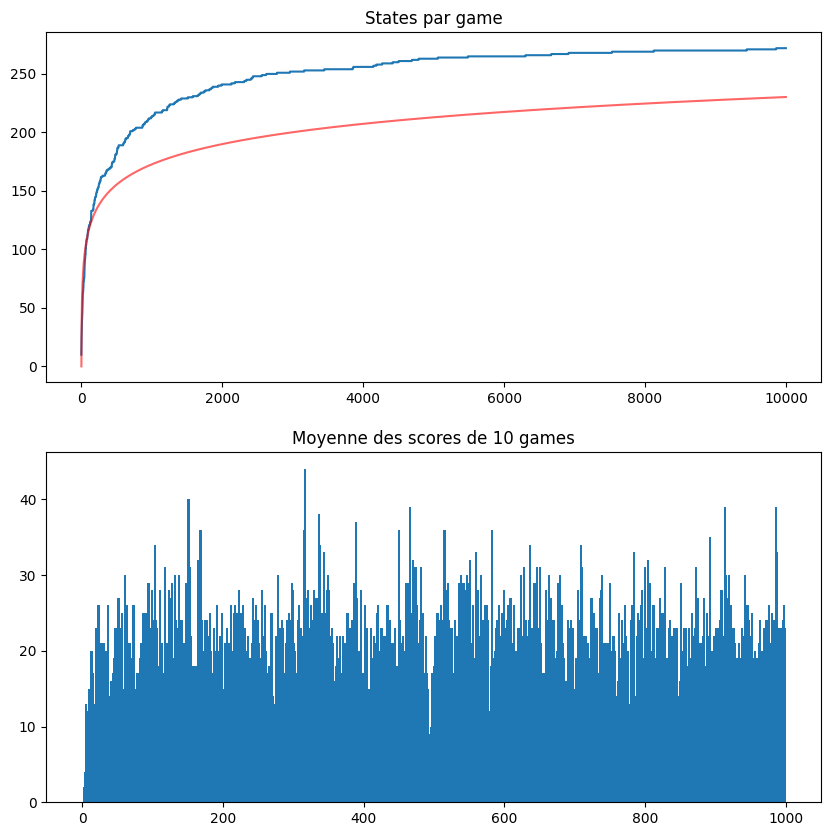

In [8]:
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(2,1)

x = range(n_game)
y = np.log(x)

ax[0].plot(nb_state)
ax[0].plot(x,25*y,color=(1,0,0,0.6))
ax[0].set_title("States par game")

ax[1].bar(range(n_game//10),score,width=3)
ax[1].set_title("Moyenne des scores de 10 games")

fig.set_figwidth(10)
fig.set_figheight(10)



#X, Y = np.meshgrid(range(3),range(len(states)))
#Z = []
#for x in range(len(states)):
#    Z.append([])
#    for y in range(3):
#        Z[x].append(Q_value[x][y])

#figure, ax = plt.subplots(1,1)
#ax.pcolormesh(X,Y,Z, cmap="plasma")
#ax.yaxis.set_minor_locator(LinearLocator(5))
#ax.invert_yaxis()

#figure.set_figheight(20)

In [9]:
import pygame
import time

def init(col,row):
    info = {}

    pygame.init()
    info['WIN'] = pygame.display.set_mode((400,400))

    info['DX'] = 400/col
    info['DY'] = 400/row
    info['col'] = col
    info['row'] = row

    info['fontText'] = pygame.font.Font("freesansbold.ttf", 32)

    return info


def render(action, score, grid, info):
    info['WIN'].fill((0, 99, 0))

    # write the score
    msg = info['fontText'].render(str(score),False,(0,0,0),(0, 85, 0))
    msg_rect = msg.get_rect()
    msg_rect.topleft = (0,0)
    
    info['WIN'].blit(msg,msg_rect)

    # draw grid
    for x in range(info['row']):
        for y in range(info['col']):
            pos = grid[y, x]
            match pos:
                case 1:
                    pygame.draw.rect(info['WIN'],(255,0,0),(x*info['DX'],y*info['DY'],info['DX'],info['DY']))
                case 2:
                    pygame.draw.rect(info['WIN'],(0,255,0),(x*info['DX'],y*info['DY'],info['DX'],info['DY']))
    
    pygame.display.flip()

def quite():
    pygame.quit()


pygame 2.1.3.dev8 (SDL 2.0.22, Python 3.11.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [10]:

test = Game(COLUMNS,ROWS)
state = test.reset()

info = init(COLUMNS,ROWS)

done = False
while not done:
    
    action = make_action(state, states, Q_value, eps=0)
    render(action, test.score, test.grid, info)
    new_state, recompense, done = test.play_step(action)
    state = new_state

    time.sleep(0.3)
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            done = True

quite()